# ****FLUSHING ANALYTICS****


# Installing Dependencies

In [12]:
%pip install pandas
%pip install pyproj
%pip install scikit-learn
%pip install openpyxl
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------------------- ----------------- 163.8/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install optuna
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Preparing the Data

## Loading and exploring the datasets

In [2]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from pyproj import Proj, transform

# file_path = '/EllaTesting/Files/Repairs_2018_2023.xlsx'

# print(file_path)

# Creating DataFrames from spreadsheets
all_hydrants_filepath = "Qry_AllHY.csv"
flushing_history_filepath = "Qry_FlushHistory.csv"

all_hydrants_df = pd.read_csv(all_hydrants_filepath)
flushing_history_df = pd.read_csv(flushing_history_filepath)

C:\Users\17561\AppData\Local\Temp\1\ipykernel_18768\881486883.py:20: DtypeWarning: Columns (33,50,57,91) have mixed types. Specify dtype option on import or set low_memory=False.
  all_hydrants_df = pd.read_csv(all_hydrants_filepath)
C:\Users\17561\AppData\Local\Temp\1\ipykernel_18768\881486883.py:21: DtypeWarning: Columns (0,4,5,15,23,24,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  flushing_history_df = pd.read_csv(flushing_history_filepath)


## Data Cleaning and Preprocessing

### Data Cleaning - History Table

In [3]:
# Creating a copy of the Flushing History DataFrame
copied_flushing_history_df = copy.deepcopy(flushing_history_df)

In [4]:
#delete all unnecessary columns
copied_flushing_history_df = copied_flushing_history_df.drop(columns={'FLSHTIME3', 'FLSHTIME4', 'FLSHTIME5', 'FLSHTIME6', 'FLSHTIME7', 'FLSHTIME8', 'FLSHTIME9', 'FLSHTIME10', 'FLSHTIME11', 'FLSHVOL1', 'FLSHVOL2', 'FLSHVOL3', 'FLSHVOL4', 'FLSHVOL5', 'FLSHVOL6', 'FLSHVOL7', 'FLSHVOL8', 'FLSHVOL9', 'FLSHVOL10', 'FLSHVOL11', 'CLFREE3', 
                                                                      'CLFREE4', 'CLFREE5', 'CLFREE6', 'CLFREE7', 'CLFREE8', 'CLFREE9', 'CLFREE10', 'CLFREE11', 'CLTOTL3', 'CLTOTL4', 'CLTOTL5', 'CLTOTL6', 'CLTOTL7', 'CLTOTL8', 'CLTOTL9', 'CLTOTL10', 'CLTOTL11', 'ADDBY', 'ADDDTTM', 'MODBY', 'MODDTTM', 'REMARKS', 'FLSHTIME', 'FLUSHNC', 'NFREASON',  
                                                                      'CLTOTL1', 'CLTOTL2', 'CLTOTL', 'UNSCEHDLD',  'ALTERNATE'})

In [5]:
copied_flushing_history_df.shape

(116808, 16)

In [6]:
copied_flushing_history_df = copied_flushing_history_df.dropna(subset=['FLSHFRE', 'FLSHDATE', 'CLFREE', 'PHREAD', 'FLSHVOL', 'FLSHDUR', 'COMPKEY'])

In [7]:
copied_flushing_history_df.shape

(112606, 16)

In [8]:
copied_flushing_history_df.head(10)

,INSPKEY,GRIDKEY,FLSHFRE,FLSHDATE,CLFREE,PHREAD,FLSHVOL,FLSHDUR,INSPBY,CLFREE1,CLFREE2,WWNUM,COMMUN,COMPKEY,FLSHTIME1,FLSHTIME2
6,965966,19046430,1 WEEK,2019-04-23,1.18,7.92,1.000,5.0,61535,NaN,NaN,WW220003993,CD,805425.0,NaN,NaN
7,972209,19048814,1 MONTH,2019-04-25,1.66,7.90,18.000,10.0,65673,1.67,NaN,WW220003993,CV,9876.0,15:05,NaN
8,972253,19048815,1 MONTH,2019-04-25,1.33,7.51,10.000,10.0,65673,1.30,NaN,WW260002590,CR,540642.0,09:55,NaN
9,965951,19048816,1 WEEK,2019-04-29,1.69,7.50,6.000,5.0,65673,NaN,NaN,WW260002590,CT,531455.0,NaN,NaN
10,965955,19048817,2 WEEKS,2019-04-30,1.67,7.86,10.000,10.0,65673,1.64,NaN,WW220003993,CV,541072.0,10:50,NaN
11,965950,19048818,1 WEEK,2019-04-30,0.72,8.09,23.000,15.0,65673,0.77,0.82,WW260094120,CB,528297.0,09:40,09:45
12,970581,19048819,2 WEEKS,2019-05-01,1.09,8.21,1.000,5.0,61535,NaN,NaN,WW260094120,CB,9986.0,NaN,NaN
13,970575,19048820,2 WEEKS,2019-05-01,1.11,8.31,1.000,5.0,61535,NaN,NaN,WW260094120,CCC,9263.0,NaN,NaN
14,965730,19048821,3 DAYS,2019-03-01,0.92,7.69,1.194,20.0,35832,NaN,NaN,WW260094120,B,7781.0,NaN,NaN
15,965730,19048822,3 DAYS,2019-04-30,0.42,7.89,5.000,13.0,68527,0.71,NaN,WW260094120,B,7781.0,07:40,NaN


In [9]:
copied_flushing_history_df.to_csv('historycheck.csv', index=False)

#### Imputing Missing Categorical Data

In [10]:
#TODO: Ayan: Use the COMPKEY to fill out the missing values in COMMUN
# Sorting the DataFrame by COMPKEY, as there is a pattern between COMPKEY values and COMMUN values
copied_flushing_history_df = copied_flushing_history_df.sort_values('COMPKEY')

# Imputing every missing value with the value that came before it in the sorted DataFrame
copied_flushing_history_df['COMMUN'] = copied_flushing_history_df['COMMUN'].ffill()

#### Imputing Missing Numerical Data

In [ ]:
print("FLSHVOL:")
print(copied_flushing_history_df['FLSHVOL'].head(50))

In [ ]:
print("FLSHDUR:")
print(copied_flushing_history_df['FLSHDUR'].head(50))

In [ ]:
copied_flushing_history_df

In [ ]:
# Imputing missing values in the FLSHVOL column with the median of the column
copied_flushing_history_df['FLSHVOL'] = copied_flushing_history_df['FLSHVOL'].fillna(copied_flushing_history_df['FLSHVOL'].median())
print("FLSHVOL (imputed):")
print(copied_flushing_history_df['FLSHVOL'].head(50))

In [ ]:
# Imputing missing values in the FLSHVOL column with the median of the column
copied_flushing_history_df['FLSHDUR'] = copied_flushing_history_df['FLSHDUR'].fillna(copied_flushing_history_df['FLSHDUR'].median())
print("FLSHDUR (imputed):")
print(copied_flushing_history_df['FLSHDUR'].head(50))

#### Detecting and Replacing Outliers

To mitigate bias in the model

In [13]:
# For visualizing the box and whisker plot
import seaborn as sns

# Replaces all outliers within a given column with the median of that column
def replace_outliers(df, column):
    # Creates a box and whisker plot to visualize data points that are considered to be outliers
    sns.boxplot(df[column])
    plt.title(f"Original Box and Whisker Plot for {column}")
    plt.show()
    
    # Computing the first, second (median), and third quartiles
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.5)
    q3 = df[column].quantile(0.75)

    print(f"First quartile is {q1}")
    print(f"Median is {q2}")
    print(f"Third quartile is {q3}")
    
    # Computing the interquartile range
    iqr = q3 - q1

    # Values that are lower than the lower fence or higher than the upper fence are considered to be outliers
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)

    print(f"Lower fence is {lower_fence}")
    print(f"Upper fence is {upper_fence}")

    # Replace outliers with the median
    adjusted_column = [x if lower_fence <= x <= upper_fence else q2 for x in df[column]]
    
    # New box and whisker plot with outliers adjusted
    sns.boxplot(adjusted_column)
    plt.title(f"New Box and Whisker Plot for {column}")
    plt.show()

    return adjusted_column

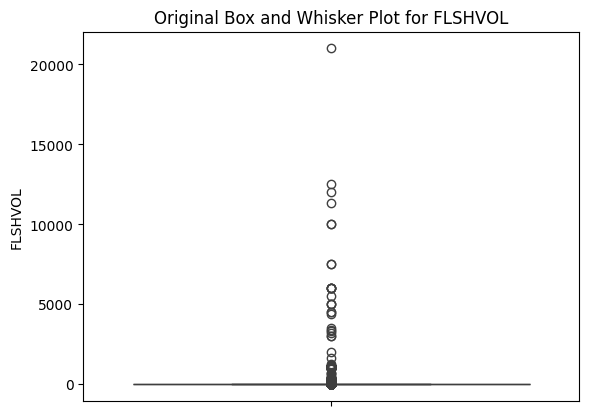

First quartile is 5.0
Median is 10.0
Third quartile is 18.0
Lower fence is -14.5
Upper fence is 37.5


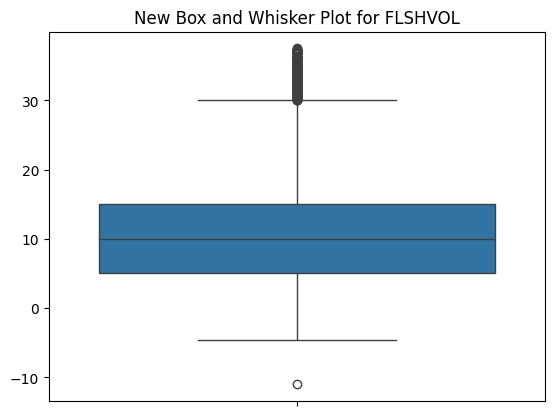

In [14]:
# Replacing outliers in the FLSHVOL column
copied_flushing_history_df['FLSHVOL'] = replace_outliers(copied_flushing_history_df, 'FLSHVOL')

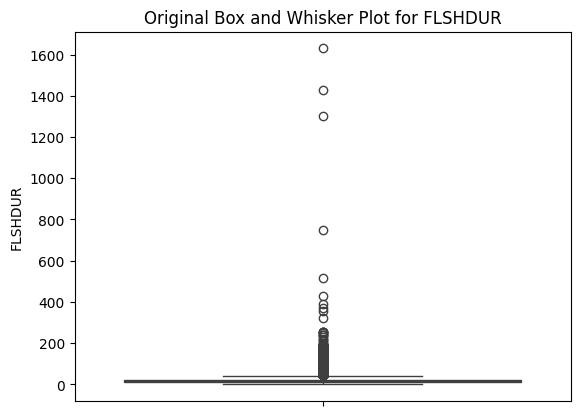

First quartile is 10.0
Median is 15.0
Third quartile is 23.0
Lower fence is -9.5
Upper fence is 42.5


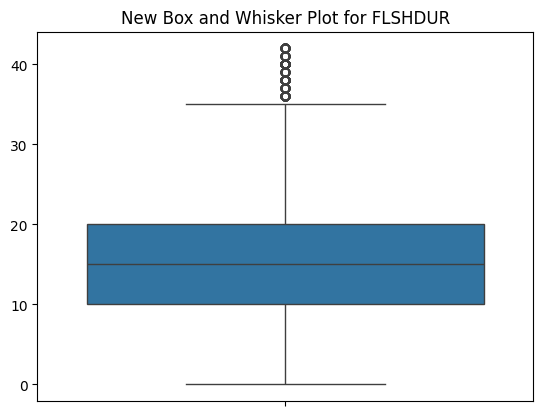

In [15]:
# Replacing outliers in the FLSHDUR column
copied_flushing_history_df['FLSHDUR'] = replace_outliers(copied_flushing_history_df, 'FLSHDUR')

### Data Cleaning - Hydrant Table

In [16]:
# Creating a copy of the All Hydrants DataFrame
copied_all_hydrants_df = copy.deepcopy(all_hydrants_df)

In [18]:
# Filters rows where flushing frequency is blank
copied_all_hydrants_df = copied_all_hydrants_df[copied_all_hydrants_df['FLSHFRE'].notnull()]
copied_all_hydrants_df.describe()

,ADDRKEY,AUXVALVE,BARRELSIZE,IMSRO_COMPHY_COMPKEY,COMPLEXKEY,FEEDERDIAM,FEEDERLEN,GISSTATIC,HT,INTKEY,...,EMASSTCRTL,EMASSTCRDT,EMASSTRISK,EMASTRSKDT,EMDISTRICT,EMEQPMNTCL,EMEQPMNTTP,EMASSTDESC,EMCOND,EMCONDDATE
count,2389.000000,0.0,2389.0,2.389000e+03,2389.0,2389.000000,2389.000000,0.0,2389.0,2389.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,81076.322729,NaN,0.0,3.362129e+05,1.0,63.729594,4.024884,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,122051.138142,NaN,0.0,4.165480e+05,0.0,74.163875,29.154112,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1003.000000,NaN,0.0,1.002000e+03,1.0,0.000000,0.000000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3243.000000,NaN,0.0,9.067000e+03,1.0,0.000000,1.200000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5478.000000,NaN,0.0,1.939500e+04,1.0,0.000000,2.291000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,129011.000000,NaN,0.0,7.158620e+05,1.0,150.000000,3.500000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,437401.000000,NaN,0.0,1.312755e+06,1.0,150.000000,1166.540000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Imputing Missing Categorical Values

In [20]:
# Item 3: Clean data, replace nulls with values in some columns
copied_all_hydrants_df['UNITTYPE'] = copied_all_hydrants_df['UNITTYPE'].fillna('STDHY')

In [21]:
copied_all_hydrants_df['UNITTYPE'].describe()

count       2389
unique         2
top       HYBLWF
freq        2350
Name: UNITTYPE, dtype: object

In [22]:
copied_all_hydrants_df = copied_all_hydrants_df[copied_all_hydrants_df['OWN'].isin(['R', 'NAMP'])]
copied_all_hydrants_df = copied_all_hydrants_df[copied_all_hydrants_df['SERVSTAT'].isin(['A', 'ANYR'])]
copied_all_hydrants_df = copied_all_hydrants_df[copied_all_hydrants_df['EXPDATE'].isnull()]

In [23]:
copied_all_hydrants_df = copied_all_hydrants_df.drop(columns={'ADDRKEY', 'ADDRQUAL', 'AUXVALVE', 'BARRELSIZE', 'COMPLEXKEY', 'GISSTATIC', 'HT', 'INTKEY', 'MAPNO', 'OBST', 'OUTLSZ4', 'PACKING', 'PAINTTYPE', 'PRCLKEY', 'SEGKEY', 'SERNO', 'SLKEY', 'SPECINST', 'STKEY', 'WVKEY', 'BGTNO', 'USGAREAKEY', 'EXPBY', 'EXPDATE', 'ADDBY', 'MODBY', 'MODDTTM',
                                                              'LASTINSP', 'LASTWINT', 'OLDID', 'WMODID', 'MUNICIPAL', 'FLUDATE', 'WWNUM', 'LASTFREE', 'LASTOTAL', 'FLSHFRE_GIS', 'MINFLTM', 'AVKCLIP', 'ASUMDATE', 'MAINTBY', 'REPLABY', 'REPLAFOR', 'FRFLWVLDDT', 'ASSTGRPID', 'EMDEPT', 'EMDIV', 'EMSERV', 'EMSERVCAT', 'EMCAMASTCL', 'EMASSTPRNT', 'EMPURCHDAT',
                                                                  'EMESTSRVLF', 'EMRMGSRVLF', 'EMRMSRLFDT', 'EMREPLCOST', 'EMREPCOSDT', 'EMPURINCST', 'EMASSTCRTL', 'EMASSTCRDT', 'EMASSTRISK', 'EMASTRSKDT', 'EMDISTRICT', 'EMEQPMNTCL', 'EMEQPMNTTP', 'EMASSTDESC', 'EMCOND', 'EMCONDDATE', 'OWN', 'SERVSTAT', 'DISTRICT', 'ASBLT', 'WATPLATT',
                                                                  'LSTFMAX1',	'LSTFMAX2',	'LSTFMAX3',	'AVE3FMAX',	'LSTTMAX1',	'LSTTMAX2',	'LSTTMAX3',	'AVE3TMAX', 'ASBLT', 'ZCOORD', 'PRESSMIN',	'PRESSMAX',	'FIRFLGPM',	'OUTELEVN',	'MDLRESRD', 'FEEDERTYPE'})

In [25]:
copied_all_hydrants_df.to_csv('hydrantcheck.csv', index=False)

In [26]:
#TODO: Ayan: Imputing the missing data for PRESZONE
# Based on other rows with similar data as the missing rows in PRESZONE, PG8 is the most suitable value to impute here
copied_all_hydrants_df['PRESZONE'] = copied_all_hydrants_df['PRESZONE'].fillna("PG8")

In [21]:
#TODO: Jordan: Imputing the missing data for SUBAREA

subarea_mode = copied_all_hydrants_df['SUBAREA'].mode()[0]
copied_all_hydrants_df['SUBAREA'] = copied_all_hydrants_df['SUBAREA'].fillna(subarea_mode)
print(copied_all_hydrants_df['SUBAREA'].isna().sum())

0


In [ ]:
#TODO: Jordan: What are the differences between AREA, SUBAREA, COMMUN, WARDID. Which columns to keep and why?

In [ ]:
#TODO: Ayan: Imputation for DECLREQD
copied_all_hy_df['DECLREQD'].fillna(copied_all_hy_df['NONSCHE'].value_counts().idxmax(), inplace=True)

In [20]:
#TODO: Ella: Convert null to N for HYMARKER
copied_all_hydrants_df['HYMARKER'] = copied_all_hydrants_df['HYMARKER'].fillna('N')

In [ ]:
#TODO: Ayan: Impute FEEDERTYPE

In [105]:
#TODO: Ella + Jordan: For INSTDATE: Convert year 9999 to null, then see whether we can use the ADDDTTM and/or the first time a hydrant was flushed in the history table to fill this info in. After filling in the info, delete ADDTTM
# Then calculate the age of the asset and delete INSTDATE column

In [2]:
#TODO: Jordan: Clean up the values in MODEL column (group those that are of similar values but in different forms) & fill the null value with UNKNOWN

import pandas as pd

# Load the updated dataset
df = pd.read_csv("hydrantcheck.csv")

# Standardize the values in the MODELNO column
df['MODELNO'] = df['MODELNO'].str.strip().str.upper()

# Fill missing values with 'UNKNOWN'
df['MODELNO'] = df['MODELNO'].fillna('UNKNOWN')

# Define a mapping for similar model numbers
modelno_mapping = {
    'BRIGADIER': [
        'BRIG', 'BRIGADIER', 'BRIGADIER M67', 'BRIGADEER', 'BRIGADERE', 
        'BRIGD', 'BRIGA', 'BRIGADIER M64', 'BRIGADIER M67B', 
        'BRIGADIER M67B-002', 'BRIGIDAR', 'BRIGIDERE', 'BRIGG', 'BRIG.', 'brig', 'brig.', 'Brig'
    ],
    'CENTURY': [
        'CENTURY', 'century', 'CEN', 'CENT', 'CENTRY', 'CENTRUY', 
        'CENURY', 'CENTY', 'CENTRYY', 'CENRTY', 'CCENTURY', 'c entury', 'CEN.'
    ],
    '27/100': ['27/100', '27-100', '27-00', '27/00', 'B52700'],
    'M67': [
        'M67', 'M67B', 'M67B-002', 'M67-B', 'M67 BRIG', 'M67 BRIGADIER', 
        'M67 BRIGADIER', 'M67-BRIG', 'M67D', 'M67E', 'M67Y', 'M67m', 
        'M67\r\nM67', 'M-67', 'M67M', 'M 67', 'M67-brig.', 'm67', 'm67b'
    ],
    'D67': ['D67', 'D67M', 'D-67', 'D-67M', 'D67m', 'D57M'],
    'B50': [
        'B50', 'B50-B24', 'B50-B18', 'B50-B-24', 'B-50-B', 
        'B-50', 'B67', 'B560-B24', 'B50B'
    ],
    'C': ['C', 'C61', 'C61A'],
    '3 PORT': [
        '#5', '5', '3', '3-PORT', '3 PORT', '3 PORTS', '3PORT BRIGADIER', 
        '3PORT BRIGADIER M67B', '3PORT BRIGADIER M67B', 'M3', 
        'M-93', 'SIGELOCK SPARTAN', 'THREE PORT', 'TWO PORT'
    ]
    # Add more mappings as needed
}

# Reverse the mapping for easy replacement
reverse_modelno_mapping = {}
for key, values in modelno_mapping.items():
    for value in values:
        reverse_modelno_mapping[value] = key

# Apply the mapping to the MODELNO column
df['MODELNO'] = df['MODELNO'].replace(reverse_modelno_mapping)

# Verify the changes
print(df['MODELNO'].unique())
print(df['MODELNO'].isna().sum())

# Save the cleaned dataset
df.to_csv('cleaned_hydrantcheck.csv', index=False)


['CENTURY' 'M67' 'D67' 'M59M' '2700' 'B50' 'M59' 'UNKNOWN' 'BRIGADIER'
 'B-05' 'B20-B24' 'CAN-VAL' 'C' '3 PORT' 'SL GATE' '27/100' 'SENTINEL'
 'DARLING' 'AVK' 'MACAVITY' 'MCAVITY' 'BRIDGADIER M67B' 'M-67B']
0


In [104]:
#TODO: Ayan: Impute the missing value for NONSCHE
copied_all_hy_df['NONSCHE'].fillna(copied_all_hy_df['NONSCHE'].value_counts().idxmax(), inplace=True)

In [101]:
#TODO: Ella to cluster XCOORD and YCOORD, then delete these 2 columns from the dataset

In [102]:
#TODO: Ayan to find the right column to merge the 2 datasets. After merging, delete all the ...KEY columns (identification columns) in the merge df

# Renaming the column so that the name is the same in both datasets
copied_all_hydrants_df.rename(columns={'IMSRO_COMPHY_COMPKEY': 'COMPKEY'}, inplace=True)

In [ ]:
# Merging the DataFrames based on the 'COMPKEY' column - similar to a SQL left outer join
merged_df = pd.merge(copied_all_hy_df, copied_flushing_history_df, on='COMPKEY', how='left')

merged_df.drop(['COMPKEY'], axis=1)

# Save the result to a new Excel file
result.to_excel('combined_spreadsheet.xlsx', index=False)

In [9]:
# Item 9: Formatting coordinates as numeric data
copied_all_hydrants_df['XCOORD'].head()
copied_all_hydrants_df['XCOORD_float'] = pd.to_numeric(copied_all_hydrants_df['XCOORD'], errors='coerce')
copied_all_hydrants_df['YCOORD_float'] = pd.to_numeric(copied_all_hydrants_df['YCOORD'], errors='coerce')
copied_all_hydrants_df['XCOORD_float'].head()
copied_all_hydrants_df.describe()

,ADDRKEY,AUXVALVE,BARRELSIZE,IMSRO_COMPHY_COMPKEY,COMPLEXKEY,FEEDERDIAM,FEEDERLEN,GISSTATIC,HT,INTKEY,...,EMASSTRISK,EMASTRSKDT,EMDISTRICT,EMEQPMNTCL,EMEQPMNTTP,EMASSTDESC,EMCOND,EMCONDDATE,XCOORD_float,YCOORD_float
count,2389.000000,0.0,2389.0,2.389000e+03,2389.0,2389.000000,2389.000000,0.0,2389.0,2389.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2389.000000,2.389000e+03
mean,81076.322729,NaN,0.0,3.362129e+05,1.0,63.729594,4.024884,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603585.008429,4.835625e+06
min,1003.000000,NaN,0.0,1.002000e+03,1.0,0.000000,0.000000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574107.000000,4.817268e+06
25%,3243.000000,NaN,0.0,9.067000e+03,1.0,0.000000,1.200000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599879.840000,4.825955e+06
50%,5478.000000,NaN,0.0,1.939500e+04,1.0,0.000000,2.291000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603124.950000,4.833903e+06
75%,129011.000000,NaN,0.0,7.158620e+05,1.0,150.000000,3.500000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608432.340000,4.842763e+06
max,437401.000000,NaN,0.0,1.312755e+06,1.0,150.000000,1166.540000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,616887.720000,4.869890e+06
std,122051.138142,NaN,0.0,4.165480e+05,0.0,74.163875,29.154112,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6786.099251,1.158453e+04


In [10]:
# Uses X and Y Coordinates to find the corresponding latitude and longitude ana adds this data to the given DataFrame
def utm_to_latlon(df, xcoord, ycoord, utm_zone):
    utm_proj = Proj(proj='utm', zone=utm_zone, ellps='WGS84')
    lonlat = utm_proj(df[xcoord].values, df[ycoord].values, inverse=True)
    df['Latitude'] = lonlat[1]
    df['Longitude'] = lonlat[0]
    return df

In [11]:
copied_all_hydrants_df = utm_to_latlon(copied_all_hydrants_df, 'XCOORD_float', 'YCOORD_float', utm_zone=10)
copied_all_hydrants_df.head()
copied_all_hydrants_df.describe()

,ADDRKEY,AUXVALVE,BARRELSIZE,IMSRO_COMPHY_COMPKEY,COMPLEXKEY,FEEDERDIAM,FEEDERLEN,GISSTATIC,HT,INTKEY,...,EMDISTRICT,EMEQPMNTCL,EMEQPMNTTP,EMASSTDESC,EMCOND,EMCONDDATE,XCOORD_float,YCOORD_float,Latitude,Longitude
count,2389.000000,0.0,2389.0,2.389000e+03,2389.0,2389.000000,2389.000000,0.0,2389.0,2389.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2389.000000,2.389000e+03,2389.000000,2389.000000
mean,81076.322729,NaN,0.0,3.362129e+05,1.0,63.729594,4.024884,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,603585.008429,4.835625e+06,43.666383,-121.715269
min,1003.000000,NaN,0.0,1.002000e+03,1.0,0.000000,0.000000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,574107.000000,4.817268e+06,43.500369,-122.077736
25%,3243.000000,NaN,0.0,9.067000e+03,1.0,0.000000,1.200000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,599879.840000,4.825955e+06,43.578955,-121.760724
50%,5478.000000,NaN,0.0,1.939500e+04,1.0,0.000000,2.291000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,603124.950000,4.833903e+06,43.651207,-121.719748
75%,129011.000000,NaN,0.0,7.158620e+05,1.0,150.000000,3.500000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,608432.340000,4.842763e+06,43.731067,-121.655763
max,437401.000000,NaN,0.0,1.312755e+06,1.0,150.000000,1166.540000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,616887.720000,4.869890e+06,43.976043,-121.552075
std,122051.138142,NaN,0.0,4.165480e+05,0.0,74.163875,29.154112,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6786.099251,1.158453e+04,0.104866,0.082829


In [12]:
from sklearn.cluster import DBSCAN

# Applies a DBSCAN algorithm to organize latitude and longitude data 
dbscan = DBSCAN(eps=0.1, min_samples=5)
# Delete rows with empty longitude or latitude values
copied_all_hydrants_df = copied_all_hydrants_df.dropna(subset=['Longitude', 'Latitude'])
# Remove latitude/longitude values that are positive/negative infinity
copied_all_hydrants_df['Latitude'] = copied_all_hydrants_df['Latitude'].replace([np.inf, -np.inf], np.nan).dropna()
copied_all_hydrants_df['Longitude'] = copied_all_hydrants_df['Longitude'].replace([np.inf, -np.inf], np.nan).dropna()
# print(copied_all_hydrants_df.sort_values(by=['Latitude'], ascending=False).head())
# Remove any other blank values from the latitude/longitude columns
copied_all_hydrants_df['Latitude'] = copied_all_hydrants_df['Latitude'].dropna()
copied_all_hydrants_df['Longitude'] = copied_all_hydrants_df['Longitude'].dropna()
copied_all_hydrants_df.dropna(subset=['Longitude', 'Latitude'], inplace=True)
print(copied_all_hydrants_df['Latitude'].describe())
print(copied_all_hydrants_df['Longitude'].describe())
print(copied_all_hydrants_df['Latitude'].isna().sum())
print(copied_all_hydrants_df['Longitude'].isna().sum())

count    2389.000000
mean       43.666383
std         0.104866
min        43.500369
25%        43.578955
50%        43.651207
75%        43.731067
max        43.976043
Name: Latitude, dtype: float64
count    2389.000000
mean     -121.715269
std         0.082829
min      -122.077736
25%      -121.760724
50%      -121.719748
75%      -121.655763
max      -121.552075
Name: Longitude, dtype: float64
0
0


In [13]:
copied_all_hydrants_df['Geo_Cluster'] = dbscan.fit_predict(copied_all_hydrants_df[['Longitude', 'Latitude']])

In [14]:
copied_all_hydrants_df.head()

,ADDRKEY,ADDRQUAL,AREA,ASBLT,AUXVALVE,BARRELSIZE,COLOR,IMSRO_COMPHY_COMPKEY,COMPLEXKEY,DISTRICT,...,EMEQPMNTCL,EMEQPMNTTP,EMASSTDESC,EMCOND,EMCONDDATE,XCOORD_float,YCOORD_float,Latitude,Longitude,Geo_Cluster
65,1494,20 - 22,B31,NaN,NaN,0,BLUE,1673,1,C,...,NaN,NaN,NaN,NaN,NaN,597828.69,4841977.83,43.724380,-121.785410,0
76,1509,16,B31,NaN,NaN,0,BLUE,1696,1,C,...,NaN,NaN,NaN,NaN,NaN,596099.18,4844170.61,43.744345,-121.806486,0
126,2226,56,B31,NaN,NaN,0,BLUE,2847,1,C,...,NaN,NaN,NaN,NaN,NaN,596309.85,4841454.28,43.719866,-121.804357,0
138,211559,NaN,B06,NaN,NaN,0,ORANGE,2863,1,C,...,NaN,NaN,NaN,NaN,NaN,602040.45,4833238.58,43.645143,-121.734786,0
139,2246,7,B12,NaN,NaN,0,BLUE,2864,1,C,...,NaN,NaN,NaN,NaN,NaN,603629.16,4841098.82,43.715680,-121.713581,0


In [15]:
copied_all_hydrants_df['Geo_Cluster'].describe()

count    2389.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Geo_Cluster, dtype: float64

In [16]:
print(copied_all_hydrants_df.shape)
na_copied_all_hydrants_df = copy.deepcopy(copied_all_hydrants_df)
na_copied_all_hydrants_df.shape

(2389, 123)


(2389, 123)

In [ ]:
# copied_all_hydrants_df = copied_all_hydrants_df.fillna('Unknown')
# copied_all_hydrants_df

In [17]:
knn_copied_all_hydrants_df = copy.deepcopy(copied_all_hydrants_df)

In [18]:
copied_all_hydrants_df['FLSHFRE'].describe()

count       2389
unique        12
top       1 YEAR
freq        1221
Name: FLSHFRE, dtype: object

In [19]:
copied_all_hydrants_df['FLSHFRE'].unique()

array(['1 YEAR', '3 MONTHS', '6 MONTHS', '3 DAYS', '1 WEEK', '4 MONTHS',
       '2 WEEKS', '1 MONTH', '2 MONTHS', '3 WEEKS', '2 DAYS', 'DAILY'],
      dtype=object)

In [20]:
# Specifying columns in the dataset that we will clean for missing data and outliers
all_hy_columns_to_adjust = ['PRESSMIN', 'PRESSMAX']
flush_hist_columns_to_adjust = ['FLSHVOL', 'FLSHDUR']

### Imputing Missing Values

In [21]:
for col in columns_to_adjust:
    print(f"Column: {col}")
    print(copied_all_hydrants_df[col].head(50))
    print("---------------------------------------------------------------")

Column: PRESSMIN
65     60.7656
76     72.6852
126    65.7167
138    73.0940
139    72.6360
143    54.7469
154    70.7205
304    72.4360
309    83.3325
312    89.5256
324    70.7652
328    61.8132
329    61.9111
340    72.3439
349    54.0032
355    61.4530
363    55.9765
394        NaN
402    70.9262
403    67.7282
413    77.3031
449    58.9533
459    80.5179
469    72.5541
475    65.7466
480    49.2915
486    75.6050
595    62.5853
636    77.2544
639    73.1378
679    41.6938
693    74.2959
696        NaN
750    84.6836
753    81.6176
777    63.8080
785    58.6898
793    48.2959
796    55.2642
843    63.4781
854    72.3948
883    64.5949
916    97.9277
962    69.4346
969    78.2441
981    59.9541
989    53.0359
995    50.4947
996    52.4633
998    53.7308
Name: PRESSMIN, dtype: float64
---------------------------------------------------------------
Column: PRESSMAX
65      83.1983
76      72.7167
126     84.3747
138    113.7570
139    113.5766
143     69.2250
154    109.9626
304    11

In [22]:
# Replaces missing values in a given column with the median of that column
def impute_missing_vals(column):
    median = copied_all_hydrants_df[column].median()
    return copied_all_hydrants_df[column].fillna(median)

In [23]:
# Imputes missing values for each of the columns we want to clean
for col in columns_to_adjust:
    copied_all_hydrants_df[f'{col}_adjusted'] = impute_missing_vals(col)
    print(f"Column: {col}_adjusted")
    print(copied_all_hydrants_df[f'{col}_adjusted'].head(50))
    print("---------------------------------------------------------------")

Column: PRESSMIN_adjusted
65     60.7656
76     72.6852
126    65.7167
138    73.0940
139    72.6360
143    54.7469
154    70.7205
304    72.4360
309    83.3325
312    89.5256
324    70.7652
328    61.8132
329    61.9111
340    72.3439
349    54.0032
355    61.4530
363    55.9765
394    68.2433
402    70.9262
403    67.7282
413    77.3031
449    58.9533
459    80.5179
469    72.5541
475    65.7466
480    49.2915
486    75.6050
595    62.5853
636    77.2544
639    73.1378
679    41.6938
693    74.2959
696    68.2433
750    84.6836
753    81.6176
777    63.8080
785    58.6898
793    48.2959
796    55.2642
843    63.4781
854    72.3948
883    64.5949
916    97.9277
962    69.4346
969    78.2441
981    59.9541
989    53.0359
995    50.4947
996    52.4633
998    53.7308
Name: PRESSMIN_adjusted, dtype: float64
---------------------------------------------------------------
Column: PRESSMAX_adjusted
65      83.1983
76      72.7167
126     84.3747
138    113.7570
139    113.5766
143     69.225

### Detecting and Replacing Outliers
To mitigate bias in the model

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

# Replaces all outliers within a given column with the median of that column
def replace_outliers(column):
    # Creates a box and whisker plot to visualize data points that are considered to be outliers
    sns.boxplot(copied_all_hydrants_df[f'{column}_adjusted'])
    plt.title(f"Original Box and Whisker Plot for {column}_adjusted")
    plt.show()
    
    # Computing the first, second (median), and third quartiles
    q1 = copied_all_hydrants_df[f'{column}_adjusted'].quantile(0.25)
    q2 = copied_all_hydrants_df[f'{column}_adjusted'].quantile(0.5)
    q3 = copied_all_hydrants_df[f'{column}_adjusted'].quantile(0.75)

    print(f"First quartile is {q1}")
    print(f"Median is {q2}")
    print(f"Third quartile is {q3}")
    
    # Computing the interquartile range
    iqr = q3 - q1

    # Values that are lower than the lower fence or higher than the upper fence are considered to be outliers
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)

    print(f"Lower fence is {lower_fence}")
    print(f"Upper fence is {upper_fence}")

    # Replace outliers with the median
    copied_all_hydrants_df[f'{column}_adjusted'] = [x if lower_fence <= x <= upper_fence else q2 for x in copied_all_hydrants_df[f'{column}_adjusted']]
    
    # Replace outliers with the nearest value
    """
    return [x if lower_bound <= x <= upper_bound else 
            (lower_bound if x < lower_bound else upper_bound)
    """
    
    # New box and whisker plot with outliers adjusted
    sns.boxplot(copied_all_hydrants_df[f'{col}_adjusted'])
    plt.title(f"New Box and Whisker Plot for {col}")
    plt.show()

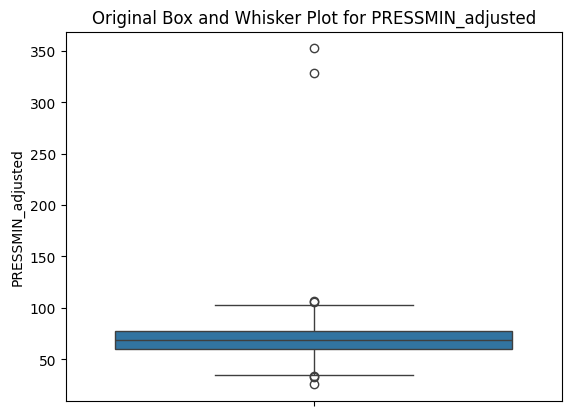

First quartile is 60.0837
Median is 68.2433
Third quartile is 77.3243
Lower fence is 34.22280000000001
Upper fence is 103.18519999999998


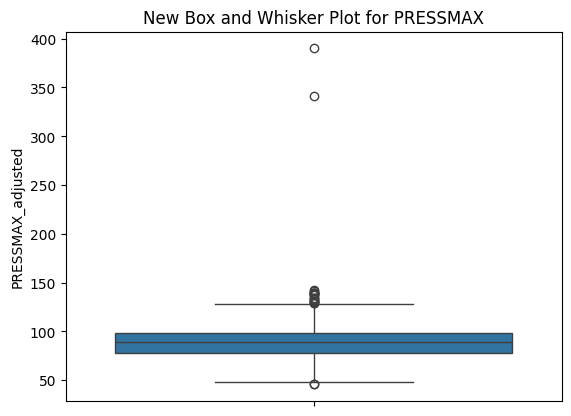

In [27]:
replace_outliers('PRESSMIN')

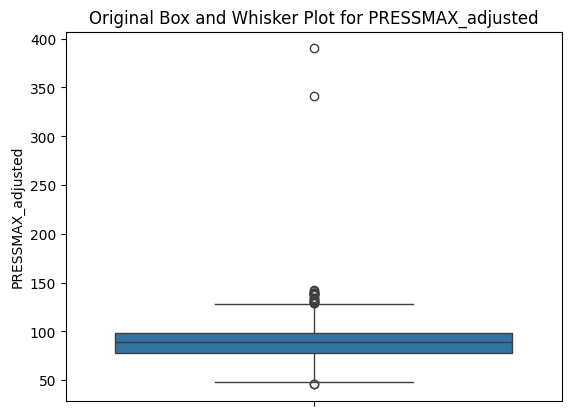

First quartile is 77.7497
Median is 88.9342
Third quartile is 98.2124
Lower fence is 47.05565000000001
Upper fence is 128.90645


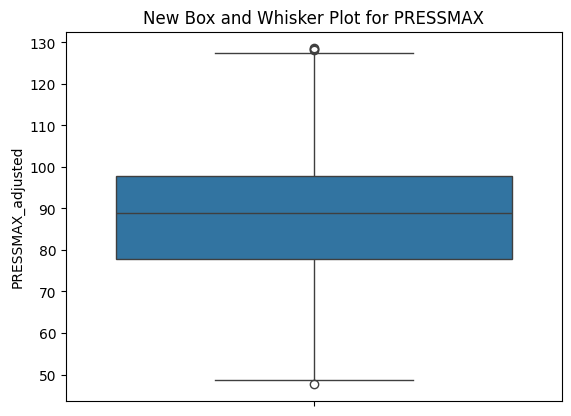

In [34]:
replace_outliers('PRESSMAX')

### Log Transformations
To normalize the data

In [47]:
import numpy as np
copied_flushing_history_df['FLSHVOL_log'] = (copied_flushing_history_df['FLSHVOL']+1).transform(np.log)

5         15.0
6          1.0
7         18.0
8         10.0
9          6.0
          ... 
116803    13.0
116804     1.0
116805    26.0
116806    20.0
116807     7.0
Name: FLSHVOL, Length: 113727, dtype: float64

In [48]:
copied_flushing_history_df['FLSHDUR_log'] = (copied_flushing_history_df['FLSHDUR']+1).transform(np.log)

### Binning

### One Hot Encoding

Extracting the letter from AREA

In [14]:
# Loading your data into a DataFrame
df = pd.read_csv("Qry_AllHY.csv")

# Extracting only the letters from the AREA column
df['Letters'] = df['AREA'].str.extract(r'([A-Za-z]+)', expand=False)

# Displaying the resulting DataFrame with only the letters
print(df[['AREA', 'Letters']])

      AREA Letters
0      B21       B
1      B21       B
2      B21       B
3      B21       B
4      B20       B
...    ...     ...
40539  S35       S
40540  S35       S
40541  S35       S
40542  S35       S
40543  B34       B

[40544 rows x 2 columns]


/tmp/ipykernel_6250/4014954066.py:2: DtypeWarning: Columns (33,50,57,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Qry_AllHY.csv")


One-hot encoding the letters

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# One-hot encoding the letters
encoder = OneHotEncoder(sparse_output=False)
encoded_letters = encoder.fit_transform(df[['Letters']])
encoded_letters_df = pd.DataFrame(encoded_letters, columns=encoder.get_feature_names_out(['Letters']))

# Combining the original DataFrame with the encoded letters
df_combined = pd.concat([df, encoded_letters_df], axis=1)

# Displaying the resulting DataFrame to ensure the columns are included
print("Original DataFrame with extracted letters and one-hot encoded columns:")
print(df_combined.head())

Original DataFrame with extracted letters and one-hot encoded columns:
   ADDRKEY            ADDRQUAL AREA ASBLT  AUXVALVE  BARRELSIZE COLOR  \
0     1893   1ST W BRAMALEA RD  B21   NaN       NaN           0  BLUE   
1     1893  1ST E  HILLDALE CR  B21   NaN       NaN           0  BLUE   
2     3430     CENTRAL PARK DR  B21   NaN       NaN           0  BLUE   
3     1893          500-CHURCH  B21   NaN       NaN           0  BLUE   
4     1893   1ST E BRAMALEA RD  B20   NaN       NaN           0  BLUE   

   IMSRO_COMPHY_COMPKEY  COMPLEXKEY DISTRICT  ...  EMEQPMNTTP  EMASSTDESC  \
0                  2237           1        C  ...         NaN         NaN   
1                  2240           1        C  ...         NaN         NaN   
2                  2241           1        C  ...         NaN         NaN   
3                  2243           1        C  ...         NaN         NaN   
4                  2244           1        C  ...         NaN         NaN   

  EMCOND  EMCONDDATE  Lette

In [27]:
#TODO: Ayan: Imputation for DECLREQD
# Replacing blank values in the 'DECLREQD' column with the mode of the column
copied_all_hydrants_df['DECLREQD'] = copied_all_hydrants_df['DECLREQD'].fillna(copied_all_hydrants_df['DECLREQD'].mode().iloc[0])

In [28]:
#TODO: Ella: Convert null to N for HYMARKER
copied_all_hydrants_df['HYMARKER'] = copied_all_hydrants_df['HYMARKER'].fillna('N')

In [30]:
#TODO: Ayan: Impute the missing value for NONSCHE
copied_all_hydrants_df['NONSCHE'] = copied_all_hydrants_df['NONSCHE'].fillna(copied_all_hydrants_df['NONSCHE'].mode().iloc[0])

#### Detecting and Replacing Outliers

In [ ]:
copied_all_hydrants_df['FEEDERLEN'] = replace_outliers(copied_all_hydrants_df, 'FEEDERLEN')

#### Binning

In [ ]:
#TODO: Jordan: Imputing the missing data for SUBAREA
#TODO: Jordan: What are the differences between AREA, SUBAREA, COMMUN, WARDID. Which columns to keep and why?

subarea_mode = copied_all_hydrants_df['SUBAREA'].mode()[0]
copied_all_hydrants_df['SUBAREA'] = copied_all_hydrants_df['SUBAREA'].fillna(subarea_mode)
print(copied_all_hydrants_df['SUBAREA'].isna().sum())

In [ ]:
# Extracting only the letters from the AREA column
copied_all_hydrants_df['Letters'] = copied_all_hydrants_df['AREA'].str.extract(r'([A-Za-z]+)', expand=False)

# Displaying the resulting DataFrame with only the letters
print(copied_all_hydrants_df[['AREA', 'Letters']])

In [ ]:
copied_all_hydrants_df[copied_all_hydrants_df['Letters'].isnull()]

In [ ]:
# Imputing the missing value with the most suitable value based on 
copied_all_hydrants_df['Letters'] = copied_all_hydrants_df['Letters'].fillna("S")

In [29]:
#TODO: Jordan: Clean up the values in MODEL column (group those that are of similar values but in different forms) & fill the null value with UNKNOWN - Done
#TODO: ELla to clean up the grouping

# Standardize the values in the MODELNO column
copied_all_hydrants_df['MODELNO'] = copied_all_hydrants_df['MODELNO'].str.strip().str.upper()

# Fill missing values with 'UNKNOWN'
copied_all_hydrants_df['MODELNO'] = copied_all_hydrants_df['MODELNO'].fillna('UNKNOWN')

['CENTURY' 'M67' 'D67' 'M59M' '2700' 'B50' 'M59' 'UNKNOWN' 'BRIGADIER'
 'B-05' 'B20-B24' 'CAN-VAL' 'C' '3 PORT' 'SL GATE' '27/100' 'SENTINEL'
 'DARLING' 'AVK' 'MACAVITY' 'MCAVITY' 'BRIDGADIER M67B' 'M-67B']
0


In [ ]:
# Define a mapping for similar model numbers
modelno_mapping = {
    'BRIGADIER': [
        'BRIG', 'BRIGADIER', 'BRIGADIER M67', 'BRIGADEER', 'BRIGADERE', 
        'BRIGD', 'BRIGA', 'BRIGADIER M64', 'BRIGADIER M67B', 
        'BRIGADIER M67B-002', 'BRIGIDAR', 'BRIGIDERE', 'BRIGG', 'BRIG.', 'brig', 'brig.', 'Brig'
    ],
    'CENTURY': [
        'CENTURY', 'century', 'CEN', 'CENT', 'CENTRY', 'CENTRUY', 
        'CENURY', 'CENTY', 'CENTRYY', 'CENRTY', 'CCENTURY', 'c entury', 'CEN.'
    ],
    '27/100': ['27/100', '27-100', '27-00', '27/00', 'B52700'],
    'M67': [
        'M67', 'M67B', 'M67B-002', 'M67-B', 'M67 BRIG', 'M67 BRIGADIER', 
        'M67 BRIGADIER', 'M67-BRIG', 'M67D', 'M67E', 'M67Y', 'M67m', 
        'M67\r\nM67', 'M-67', 'M67M', 'M 67', 'M67-brig.', 'm67', 'm67b'
    ],
    'D67': ['D67', 'D67M', 'D-67', 'D-67M', 'D67m', 'D57M'],
    'B50': [
        'B50', 'B50-B24', 'B50-B18', 'B50-B-24', 'B-50-B', 
        'B-50', 'B67', 'B560-B24', 'B50B'
    ],
    'C': ['C', 'C61', 'C61A'],
    '3 PORT': [
        '#5', '5', '3', '3-PORT', '3 PORT', '3 PORTS', '3PORT BRIGADIER', 
        '3PORT BRIGADIER M67B', '3PORT BRIGADIER M67B', 'M3', 
        'M-93', 'SIGELOCK SPARTAN', 'THREE PORT', 'TWO PORT'
    ]
    # Add more mappings as needed
}

In [ ]:
# Reverse the mapping for easy replacement
reverse_modelno_mapping = {}
for key, values in modelno_mapping.items():
    for value in values:
        reverse_modelno_mapping[value] = key

# Apply the mapping to the MODELNO column
copied_all_hydrants_df['MODELNO'] = copied_all_hydrants_df['MODELNO'].replace(reverse_modelno_mapping)

# Verify the changes
print(copied_all_hydrants_df['MODELNO'].unique())
print(copied_all_hydrants_df['MODELNO'].isna().sum())

# Save the cleaned dataset
copied_all_hydrants_df.to_csv('cleaned_hydrantcheck.csv', index=False)

#### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the letters
encoder = OneHotEncoder(sparse_output=False)
encoded_letters = encoder.fit_transform(copied_all_hydrants_df[['Letters']])
encoded_letters_df = pd.DataFrame(encoded_letters, columns=encoder.get_feature_names_out(['Letters']))

# Combining the original DataFrame with the encoded letters
copied_all_hydrants_df = pd.concat([copied_all_hydrants_df, encoded_letters_df], axis=1)

# Displaying the resulting DataFrame to ensure the columns are included
print("Original DataFrame with extracted letters and one-hot encoded columns:\n")
print(copied_all_hydrants_df.head())

#### Extracting Dates

In [105]:
#TODO: Ella + Jordan: For INSTDATE: Convert year 9999 to null, then see whether we can use the ADDDTTM and/or the first time a hydrant was flushed in the history table to fill this info in. After filling in the info, delete ADDTTM
# Then calculate the age of the asset and delete INSTDATE column

# Converting date column to datetime and extracting the year
copied_all_hydrants_df['INSTDATE'] = pd.to_datetime(copied_all_hydrants_df['INSTDATE'], errors='coerce').dt.year

# Displaying the resulting DataFrame
print(copied_all_hydrants_df['INSTDATE'].head())

In [ ]:
from datetime import datetime

# Get the current year
current_date = datetime.now().date()

# Calculate the age
copied_all_hydrants_df['AGE'] = current_year - copied_all_hydrants_df['INSTDATE']

# If INSTDATE was missing, AGE will be NaN
copied_all_hydrants_df['AGE'] = copied_all_hydrants_df['AGE'].fillna(-1)  # Filling with -1 to indicate missing ages, you can choose other strategies

print(copied_all_hydrants_df[['INSTDATE', 'AGE']].head(100))

In [ ]:
def convert_to_days(frequency):
    if pd.isna(frequency):
        return None
    frequency = frequency.upper().strip()
    if 'DAY' in frequency:
        return int(frequency.split()[0])
    elif 'DAILY' in frequency:
        return 1
    elif 'WEEK' in frequency:
        return int(frequency.split()[0]) * 7
    elif 'MONTH' in frequency:
        return int(frequency.split()[0]) * 30
    elif 'YEAR' in frequency:
        return int(frequency.split()[0]) * 365
    else:
        return None  # For any unknown frequency format

In [ ]:
# Apply the conversion function
copied_all_hydrants_df['FLSHFRE_DAYS'] = copied_all_hydrants_df['FLSHFRE'].apply(convert_to_days)
print(copied_all_hydrants_df[['FLSHFRE', 'FLSHFRE_DAYS']].head())

print(copied_all_hydrants_df['FLSHFRE_DAYS'].unique())
print(copied_all_hydrants_df['FLSHFRE'].unique())

### Merging the datasets

Using the COMPKEY column from both datasets to merge the datasets together

In [31]:
#TODO: Ayan to find the right column to merge the 2 datasets. After merging, delete all the ...KEY columns (identification columns) in the merge df

# Renaming the column so that the name is the same in both datasets
copied_all_hydrants_df.rename(columns={'IMSRO_COMPHY_COMPKEY': 'COMPKEY'}, inplace=True)

In [32]:
# Merging the DataFrames based on the 'COMPKEY' column - similar to a SQL left outer join
merged_df = pd.merge(copied_all_hydrants_df, copied_flushing_history_df, on='COMPKEY', how='right', indicator=True)

# Removing the COMPKEY column now that we don't need it
merged_df.drop(['COMPKEY'], axis=1, inplace=True)

# Save the result to a new Excel file
merged_df.to_excel('merged_dataset.xlsx', index=False)

### Feature Selection
Using mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

### Splitting the data into training and testing sets

In [ ]:
# The class to split the data into training and testing sets
from sklearn.model_selection import train_test_split
# Separating the dataset by features (independent variables) and target (dependent variable)
# x = merged_df[]
# y = merged_df['FLSHFRE']

In [ ]:
# Separating each of X and Y datasets into training and testing sets
# Fraction of data to be used for testing; the rest is to be used for training
test_size = 0.3
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

### Scaling the Data

In [ ]:
# Importing the class to use for scaling the data
from sklearn.preprocessing import MinMaxScaler

# Instantiating a MinMaxScaler object
scaler = MinMaxScaler()
# Fitting the scaler to the training features
scaler.fit(x_train)
# Scaling the training and testing features
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Training the Model

## Model 1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

### Hyperparameter Optimization

In [ ]:
import optuna

## Model 2: XGBoost

### Hyperparameter Optimization

## Model 3: Support Vector Regression

### Hyperparameter Optimization

## Model 4: Random Forest Regression

### Hyperparameter Optimization

# Result Comparison

## Comparing MSE (mean squared error)

## Consider adjusting the train-test split for better results

# Testing the Model